# CHAPTER 31: Maximum Likelihood

### This code generates figures 1, 2, and 5 from Chapter 31: Maximum Likelihood (vol II)
TEXT: A. H. Sayed, INFERENCE AND LEARNING FROM DATA, Cambridge University Press, 2022.

<div style="text-align: justify">
DISCLAIMER:  This computer code is  provided  "as is"   without  any  guarantees.
Practitioners  should  use it  at their own risk.  While  the  codes in  the text 
are useful for instructional purposes, they are not intended to serve as examples 
of full-blown or optimized designs. The author has made no attempt at optimizing 
the codes, perfecting them, or even checking them for absolute accuracy. In order 
to keep the codes at a level  that is  easy to follow by students, the author has 
often chosen to  sacrifice  performance or even programming elegance in  lieu  of 
simplicity. Students can use the computer codes to run variations of the examples 
shown in the text. 
</div>

The Jupyter notebook and python codes are developed by Eduardo Faria Cabrera

required libraries:
    
1. numpy
2. matplotlib
3. scipy

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.special import gamma
from functions import gamma_derivative

## Example 31.4 (Fitting Gaussian and Beta distributions)

The top row in Fig. 31.1 shows on the left  a histogram distribution for the serum cholesterol level measured in mg/dl for $N=297$ patients. The vertical axis measures absolute  frequencies. The plot uses 15 bins of width 30 mg/dl each, and shows how many patients fall within each bin. The same plot is normalized on the right by dividing each bin value by $N=297$ measurements and by the bin width --- recall the explanation given in Remark 6.1. By doing so, the result is an approximate pdf. A Gaussian pdf is  fitted on top of the normalized data. The mean and variance of the Gaussian distribution are determined by using expressions (31.23a) and (31.23b). If we denote the cholesterol level by the random variable $y$, then the sample mean and variance values are found to be 

$$\widehat{\mu}_\textnormal{cholesterol}\overset{\Delta}{=}\widehat{\mu}_y=\frac{1}{N}\sum_{n=1}^{N} y_n\approx 247.35 \tag{31.30a}$$

$$\widehat{\sigma}^2_\textnormal{cholesterol}=\frac{1}{N-1}\sum_{n=1}^{N} (y_n-\widehat{\mu}_y)^2\approx 2703.7 \tag{31.30b}$$

where $y_n$ refers to the $n$ th cholesterol measurement.

The bottom row in Fig 31.1 repeats the same construction for the maximal heart rate of a patient measured in beats per minute (bpm) from the same dataset. If we denote the heart rate by the random variable $z$, then the sample mean and variance values are found to be 

$$\widehat{\mu}_\textnormal{heart rate}\overset{\Delta}{=}\widehat{\mu}_z=\frac{1}{N}\sum_{n=1}^{N} z_n\approx 149.60 \tag{31.31a}$$
$$\widehat{\sigma}^2_\textnormal{heart rate}=\frac{1}{N-1}\sum_{n=1}^{N} (z_n-\widehat{\mu}_z)^2\approx 526.32 \tag{31.31b}$$

where $z_n$ refers to the $n$th heart beat measurement. By examining the rightmost lower plot in Fig. 31.1, it appears that the histogram distribution is skewed to the right. This observation motivates us to consider fitting a different distribution onto the data in order to better capture the skewness in the histogram; this is not possible if we persist with the Gaussian distribution due to its symmetry.

Estimated mean and variance (cholesterol):
Mean: 247.35016835016836
Variance: 2694.645058894217
Estimated mean and variance (heart rate):
Mean: 149.5993265993266
Variance: 524.5431645296966


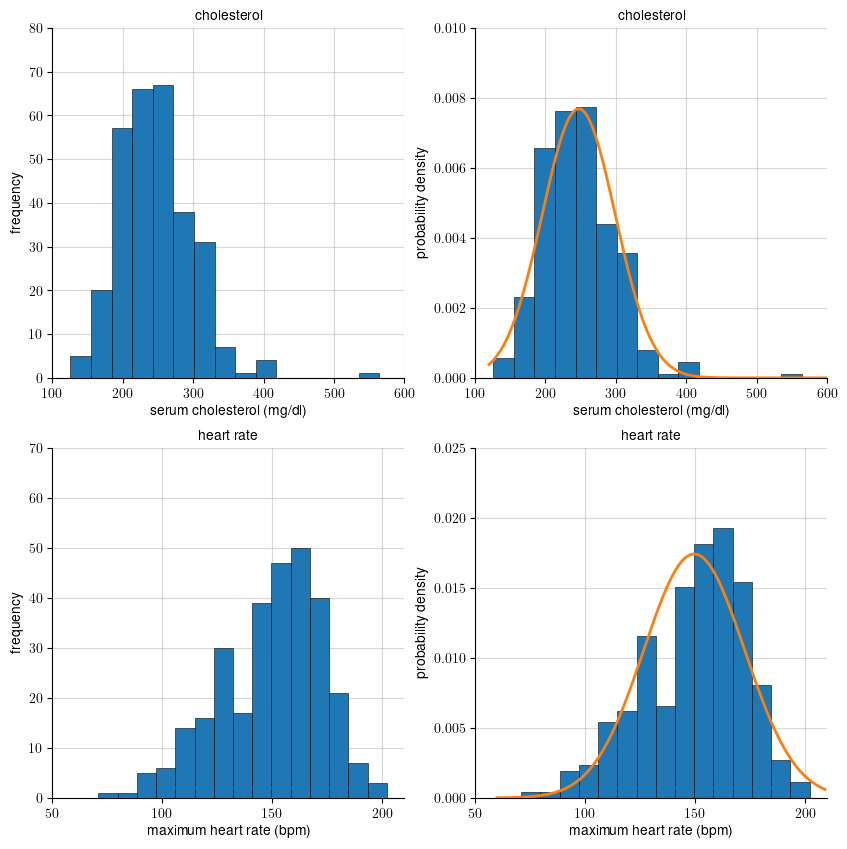

In [25]:
data = scipy.io.loadmat("data/heart_disease_data.mat") 
Ntotal = 297

features = data["B"][:Ntotal, :13] #each row is a feature vector with 14 attributes
labels = data["B"][:Ntotal, 13] #entry entry is 0=no heart disease, 1,2,3 heart disease

cholesterol = features[:, 4] #5th feature entry relates to level of serum cholesterol measured in mg/dl
                             #`defined as sum of HDL and LDL cholesterol
                             # levels, plus 20 percent of triglycerides level'
                             # HDL: high-density lipoprotein (good cholesterol)
                             # LDL: low-density lipoprotein (bad cholesterol)
                             # Measure of amount of cholesterol level in the blood

mean_c = cholesterol.mean()
var_c = cholesterol.var() #divides by N-1

print("Estimated mean and variance (cholesterol):")
print(f"Mean: {mean_c}")
print(f"Variance: {var_c}")

x = np.arange(120, 600, 1)
f = (1/(np.sqrt(2*np.pi*var_c)))*np.exp(-(x-mean_c)**2/(2*var_c))

#figure 1 (histograms)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.rcParams['figure.figsize']=10, 10
fig = plt.figure()


ax = fig.add_subplot(221)
ax.hist(cholesterol, bins=15, zorder=3, edgecolor="black", linewidth=0.4)
ax.set_xlabel("serum cholesterol (mg/dl)", fontsize=10)
ax.set_ylabel("frequency", fontsize=10)
ax.set_ylim([0, 80])
ax.set_xlim([100, 600])
ax.set_title("cholesterol", fontsize=10)
plt.xticks(np.arange(100, 700, 100))
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)

ax = fig.add_subplot(222)
ax.hist(cholesterol, bins=15, zorder=2, edgecolor="black", linewidth=0.4, density=True)
ax.plot(x, f, zorder=3,linewidth=2)
ax.set_xlabel("serum cholesterol (mg/dl)", fontsize=10)
ax.set_ylabel("probability density", fontsize=10)
ax.set_ylim([0, 0.01])
ax.set_xlim([100, 600])
ax.set_title("cholesterol", fontsize=10)
plt.xticks(np.arange(100, 700, 100))
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)

heart_rate = features[:, 7] #8th feature entry is maximum heart rate achieved 

mean_h = heart_rate.mean()
var_h = heart_rate.var() #divides by N-1

print("Estimated mean and variance (heart rate):")
print(f"Mean: {mean_h}")
print(f"Variance: {var_h}")

x = np.arange(60, 210, 1)
f = (1/(np.sqrt(2*np.pi*var_h)))*np.exp(-(x-mean_h)**2/(2*var_h))

ax = fig.add_subplot(223)
ax.hist(heart_rate, bins=15, zorder=3, edgecolor="black", linewidth=0.4)
ax.set_xlabel("maximum heart rate (bpm)", fontsize=10)
ax.set_ylabel("frequency", fontsize=10)
ax.set_ylim([0, 70])
ax.set_xlim([50, 210])
ax.set_title("heart rate", fontsize=10)
plt.xticks(np.arange(50, 250, 50))
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)

ax = fig.add_subplot(224)
ax.hist(heart_rate, bins=15, zorder=2, edgecolor="black", linewidth=0.4, density=True)
ax.plot(x, f, zorder=3,linewidth=2)
ax.set_xlabel("maximum heart rate (bpm)", fontsize=10)
ax.set_ylabel("probability density", fontsize=10)
ax.set_ylim([0, 0.025])
ax.set_xlim([50, 210])
ax.set_title("heart rate", fontsize=10)
plt.xticks(np.arange(50, 250, 50))
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)

#plt.savefig("figs/fig-1.pdf", format="pdf", bbox_inches="tight")

plt.show()

**Figure 31.1** ($\textit{Top}$) Histogram distribution of the serum cholesterol level measured in mg/dl on the left using 15 bins of width 30 mg/dl each, and its normalized version on the right where each bin value is divided by $N=297$ measurements and by the bin width. By doing so, the result is an approximate pdf. A Gaussian pdf is fitted on top of the normalized data. ($\textit{Bottom}$) A similar construction for the maximum heart rate of a patient measured in bpm. A Gaussian pdf is fitted on top of the normalized data. The data is derived from the processed Cleveland dataset from  https://archive.ics.uci.edu/ml/datasets/heart+Disease.

First, we normalize the heart rate variable so that it is confined to the interval $[0,1)$. We do so by dividing $z$ by (a slightly larger number than) the maximum heart rate in the data, which is 202. We denote this normalized variable by $t$. We have access to $N=297$ measurements $\{t_n\}$, obtained by normalizing the heart rates $z_n$ by $\epsilon+\max z_n$ (for a small $\epsilon$; this ensures that all values of $t_n$ are strictly less than 1 so that logarithms of $1-t_n$ will be well-defined further ahead in (31.34). Next, we consider fitting a $\textnormal{beta distribution}$ onto the data ${t_n}$. The pdf of a beta distribution has the form:

$$
f_{t}(t; a, b) =
\begin{cases}
\displaystyle \frac{\Gamma(a + b)}{\Gamma(a)\Gamma(b)}\,t^{a - 1}(1 - t)^{b - 1},  & 0 \le t \le 1 \\
0, & \textnormal{otherwise} \\
\end{cases} \tag{31.32}
$$

where $\Gamma(x)$ denotes the gamma function defined earlier in Prob. 4.3. Different choices for $(a,b)$ result in different behavior for the distribution $f_{t}(t)$.  We need to estimate the shape parameters $(a,b)$. 

We have a collection of $N$ independent measurements $\{t_n\}$. The likelihood function of these observations is given by

$$
f_{t_1,\ldots, t_N}(t_1,\ldots,t_N;a,b)=\left(\frac{\Gamma(a + b)}{\Gamma(a)\Gamma(b)}\right)^N\,\prod_{n=1}^{N}t_n^{a - 1}(1 - t_n)^{b - 1} \tag{31.33}
$$

so that, in the log domain,

$$
\ell(t_1,\ldots,t_N;a,b) =N\ln\,\Gamma(a + b)-N\ln\,\Gamma(a)-N\ln\,\Gamma(b)+\\
(a-1)\sum_{n=1}^{N}\ln t_n\;+\;(b-1)\sum_{n=1}^{N}\ln(1-t_n) \tag{31.34}
$$

Differentiating with respect to $a$ and $b$ gives

$$
\partial \ell(t_1,\ldots,t_N;a,b)/\partial a=
N\left(\frac{\Gamma'(a+b)}{\Gamma(a+b)}-\frac{\Gamma'(a)}{\Gamma(a)}
\right) +\sum_{n=1}^{N}\ln t_n \tag{31.35}
$$

$$
\partial \ell(t_1,\ldots,t_N;a,b)/\partial b=
N\left(\frac{\Gamma'(a+b)}{\Gamma(a+b)}-\frac{\Gamma'(b)}{\Gamma(b)}
\right) +\sum_{n=1}^{N}\ln(1-t_n) \tag{31.36}
$$

where $\Gamma'(x)$ denotes the derivative of the $\Gamma$-function. Two complications arise here. First, we need to know how to compute ratios of the form $\psi(x)=\Gamma'(x)/\Gamma(x)$ for the gamma function; this ratio is known as the $\textnormal{digamma}$ function and it is equal to the derivative of $\ln \Gamma(x)$. The computation of the digamma function is not straightforward. As was mentioned earlier in (5.62), and based on properties of the gamma function, it is known that 

$$
\psi(x)\overset{\Delta}{=}\frac{\Gamma'(x)}{\Gamma(x)}\approx -0.577215665 + \sum_{m=0}^{\infty}\left(\frac{1}{1+m}-\frac{1}{x+m}\right) \tag{31.37}
$$

The expression on the right-hand side can be used to approximate $\Gamma'(x)/\Gamma(x)$ by replacing the infinite series by a finite sum. Second, even then, if we set the derivatives (31.35)--(31.36) to zero, the resulting equations will not admit a  closed form solution for the parameters $(a,b)$. 

Another way to seek values $(\widehat{a},\widehat{b})$ that maximize the likelihood function is to employ a gradient-ascent recursion of the following form for $n\geq 0$ (along the lines discussed in Chapter 12 on gradient-descent algorithms):

$$
\hspace{-0.3cm} a_n=a_{n-1} + \mu\left\{\frac{\Gamma'(a_{n-1}+b_{n-1})}{\Gamma(a_{n-1}+b_{n-1})}-\frac{\Gamma'(a_{n-1})}{\Gamma(a_{n-1})}
 +\frac{1}{N}\sum_{n=1}^{N}\ln t_n\right\} \tag{31.38}
$$

$$
\hspace{-0.3cm} b_n=b_{n-1} + \mu\left\{\frac{\Gamma'(a_{n-1}+b_{n-1})}{\Gamma(a_{n-1}+b_{n-1})}-\frac{\Gamma'(b_{n-1})}{\Gamma(b_{n-1})}
 +\frac{1}{N}\sum_{n=1}^{N}\ln (1-t_n)\right\} \tag{31.39}
$$

where $\mu$ is a small step-size parameter. These recursions need to be initialized from a good starting point. In this example, we repeat the iterations for a total of 10,000 times using $\mu=0.001$. We use the construction explained next to determine good initial conditions $(a_{-1},b_{-1}$). Actually, the construction provides yet another method to fit a beta distribution onto the data, albeit one that does not need to run the gradient-ascent recursion altogether.

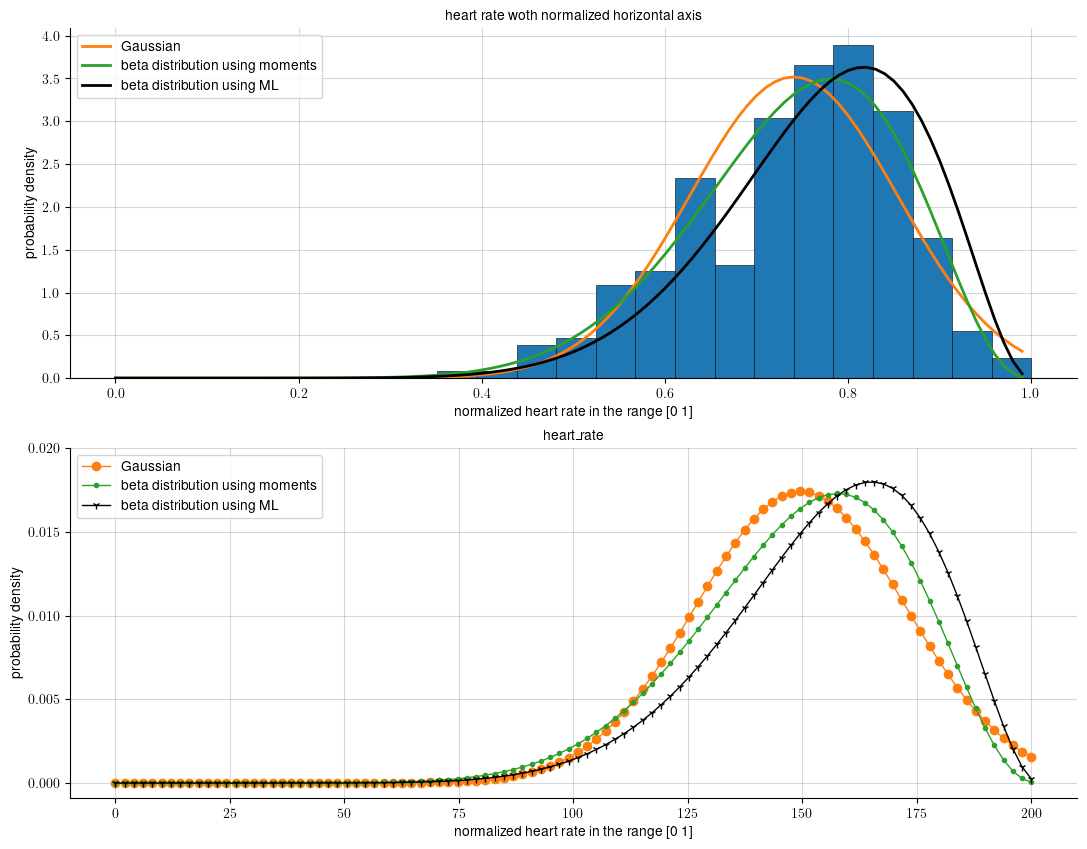

In [65]:

#fitting a beta distribution to heart rate dara
hr_data = heart_rate/(max(heart_rate)+0.00001) #all values between 0 and 1

X = scipy.stats.beta.fit(hr_data, floc=0, fscale=1) #parameters of beta distribution

a = X[0]
b = X[1]

x = np.arange(0, 1, 0.01)
fb = (gamma(a+b) / (gamma(a)*gamma(b)))*x**(a-1)*(1-x)**(b-1)

# a second way to estimate a and b is to match mean and variance to expression involving a and b

mean_2 = hr_data.mean()
var_2 = hr_data.var()

a2 = mean_2*((mean_2*(1-mean_2))/var_2 - 1)
b2 = (1 - mean_2)*((mean_2*(1-mean_2))/var_2 - 1)

f3 = (1/(np.sqrt(2*np.pi*var_2)))*np.exp(-(x-mean_2)**2/(2*var_2))
fc = (gamma(a2+b2) / (gamma(a2)*gamma(b2)))*x**(a2-1)*(1-x)**(b2-1) #second beta distribution estimate using a2, b2

# estimating the beta distribution using gradient ascent

w = np.array([a2, b2]) # initial conditions obtained from the moments before
N = 10000 #number of iterations
mu = 0.001
alpha = w[0]
beta = w[1]

L = max(hr_data.shape)
for n in range(N):
    x1 = (1/L)*sum(np.log(hr_data))
    x2 = (1/L)*sum(np.log(1-hr_data))
    y1 = gamma_derivative(alpha+beta)
    y2 = gamma_derivative(alpha)
    y3 = gamma_derivative(beta)
    g1 = y1 - y2 + x1
    g2 = y1 - y3 + x2
    w += mu*np.array([g1, g2])

a3 = w[0]
b3 = w[1]

fd = (gamma(a3+b3) / (gamma(a3)*gamma(b3)))*x**(a3-1)*(1-x)**(b3-1)

#figure 2 (fitting distributions)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.rcParams['figure.figsize']=13,7
fig = plt.figure()

plt.subplots_adjust(bottom=0.1, top=1.2)

ax = fig.add_subplot(211)
ax.hist(hr_data, bins=15, zorder=2, edgecolor="black", linewidth=0.4, density=True)
ax.plot(x, f3, zorder=3, linewidth=2, label="Gaussian", color="tab:orange")
ax.plot(x, fc, zorder=3, linewidth=2, label="beta distribution using moments", color="tab:green")
ax.plot(x, fd, zorder=3, linewidth=2, label="beta distribution using ML", color="black")
ax.set_xlabel("normalized heart rate in the range [0 1]", fontsize=10)
ax.set_ylabel("probability density", fontsize=10)
ax.set_title("heart rate woth normalized horizontal axis", fontsize=10)
plt.grid(zorder=0, alpha=0.5)
plt.legend()
ax.spines[['right', 'top']].set_visible(False)

scale = max(heart_rate+0.000001)
interval = np.arange(0, 1, 0.01)*scale

ax = fig.add_subplot(212)
ax.plot(interval, f3/scale, zorder=3, linewidth=1, label="Gaussian", marker="o", color="tab:orange")
ax.plot(interval, fc/scale, zorder=3, linewidth=1, label="beta distribution using moments", marker=".", color="tab:green")
ax.plot(interval, fd/scale, zorder=3, linewidth=1, label="beta distribution using ML", marker="1", color="black")
ax.set_xlabel("normalized heart rate in the range [0 1]", fontsize=10)
ax.set_ylabel("probability density", fontsize=10)
ax.set_title("heart_rate", fontsize=10)
plt.yticks(np.arange(0, 0.025, 0.005))
plt.grid(zorder=0, alpha=0.5)
plt.legend()
ax.spines[['right', 'top']].set_visible(False)

plt.savefig("figs/fig-2.pdf", format="pdf", bbox_inches="tight")

plt.show()


**Figure 31.2** ($\textit{Top}$) Normalized histogram for the scaled heart rate variables $\{t_n\}$, along with three pdfs: a Gaussian fit, a beta distribution fit obtained from the moment matching method, and a beta distribution fit obtained from a gradient-ascent iteration for ML. {$\textit{Bottom}$) The same probability distributions with the horizontal axis returned to the original heart rate scale (obtained by multiplying the horizontal axis of the top figure by the maximum heart rate, as well as scaling the vertical axis down by the same value to ensure that the area under each of the probability distributions stays normalized to 1). 

Indeed,  the mean and variance of a beta distribution with shape parameters $a$ and $b$ are given by

$$\bar{t} = \frac{a}{a + b}, \qquad \sigma_t^2 = \frac{ab}{(a + b)^2(a + b + 1)} \tag{31.40}$$

We can solve these equations in terms of $a$ and $b$ and find that

$$
a=\bar{t}\left(\frac{\bar{t}(1-\bar{t}\,)}{\sigma_t^2}-1\right) \tag{31.41}
$$

$$
b=(1-\bar{t})\left(\frac{\bar{t}(1-\bar{t}\,)}{\sigma_t^2}-1\right) \tag{31.42}
$$

These expressions suggest another method (called a $\textnormal{moment matching method}$)to fit the beta distribution to data measurements. We estimate the mean and variance of the distribution from the data, say, as

$$
\widehat{\bar{t}}=\frac{1}{N}\sum_{n=1}^N t_n,\;\;\;\;\;\;
\widehat{\sigma}_t^2=\frac{1}{N-1}\sum_{n=1}^N (t_n-\widehat{\bar{t}}\,\,)^2 \tag{31.43}
$$

and then use these values in (31.41)--(31.42) to estimate $a$ and $b$. Using this construction we obtain 

$$
\widehat{a}=10.2900,\;\;\;\widehat{b}=3.6043\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;(\textbf{moment matching}) \tag{31.44}
$$

This is of course not a ML solution. Using these values as initial conditions for the gradient-ascent iterations 
(31.38)--(31.39) we  arrive at a second set of estimates for $a$ and $b$:

$$
\widehat{a}=10.2552,\;\;\;\widehat{b}=3.0719\;\;\;\;\;\;(\textbf{ ML method}) \tag{31.45}
$$

The resulting beta distributions are shown in Fig. 31.2 along with the Gaussian distribution from the earlier figure for comparison purposes. 


## Figure 5 (Overfitting)

Generally, the more complex the model $\theta_k$ is, the more parameters it will involve (i.e., the larger the value of $M_k$ will be). While complex models can be expected to fit the data better because of the degree of freedom that results from using a larger number of parameters, they are nevertheless less desirable in practice. We are going to learn later in this text that complex models lead to {\em overfitting}; a property that we should avoid. Overfitting essentially amounts to using  more complex models to fit the data than is necessary. This can be illustrated by means of an example. Assume each $y_n$ is a scalar measurement that arises from small perturbations to a quadratic function of the form:

$$y=ax^2+bx+c+\textnormal{small noise}\;\;\;\;\;(\textbf{true model}) \tag{31.143}$$

where $x$ is given and $y$ is the response. For each given $x_n$, we measure the corresponding noisy $y_n$ according to this model. We could then use the $N$  data  points $\{x_n,y_n\}$ to fit a quadratic model to the data. This can be done by estimating the parameter vector $\theta=\{a,b,c\}$ of size $M=3$ by solving a least-squares problem of the form:

$$\{\widehat{a},\widehat{b},\widehat{c}\}\;=\;\underset{\{a,b,c\}}{\textnormal{argmin}}\;
\Bigg\{\sum_{n=1}^N (y_n-ax_n^2-bx_n-c)^2\Bigg\} \tag{31.144}
$$

Each term in the above cost function penalizes the squared error between the noisy measurement $y_n$ and its quadratic fit. It is straightforward to differentiate the above cost relative to $\{a,b,c\}$ and determine expressions for their estimates --- see Prob. 31.23. The expressions are not relevant for the discussion here but once they are determined, they can be used, for example, to compute predictions for future values $x_m$ by using the fitted model:

$$\widehat{y}_m=\widehat{a}\, x_m^2+\widehat{b}\, x_m +\widehat{c}\;\;\;\;\;(\textbf{prediction}) \tag{31.145}$$

If the model parameters have been learned well, one would expect $\widehat{y}_m$ to provide a good prediction for the noiseless value of $y_m$ that would have been observed under the true model $(a,b,c)$, namely, 

$$y_m=ax_m^2+bx_m+c \tag{31.146}$$

This situation is illustrated in the left plot of Fig 31.5. The red curve shows $N=21$ noisy measurements resulting from the parameters

$$\{a,b,c\}=\{-0.2883, 0.3501, -1.8359\},\;\;\;\;\sigma_v^2=3 \tag{31.147}$$

The locations of the measurements are indicated on the red line by the filled circles; the horizontal axis shows the values of $x$ with the range $x\in[-5,5]$ in increments of 1. The blue curve with squares shows the same measurements without the noise component. The black line shows the fitted curve (31.145) resulting from the following estimated parameters for this particular simulation:

$$\widehat{a},\widehat{b},\widehat{c}\}\;=\;\{-0.2115,
0.0803,-2.3376\} \tag{31.148}$$

The quality of these estimated parameters would be better and their values would be closer to the true $(a,b,c)$ if we use larger $N$ and have less noise. We continue with the values (31.148) to illustrate the main idea and to facilitate the visualization of the resulting effects. Using the fitted curve (31.145) we can predict values for the nonnoisy curve for any given $x$. For example, for $x=-1.3$,  we get

$$
x=-1.3\;\;\Longrightarrow \left\{\begin{array}{rll} ax^2+bx+c\approx -2.7781&(\textnormal{non-noisy measurement})\\
\widehat{y}=\widehat{a}\, x^2+\widehat{b}\, x +\widehat{c}\approx -2.7993&(\textnormal{prediction})
\end{array}
\right. \tag{31.149}
$$


Model parameters [a, b, c] and estimates: 
Model parameters: [0.2797561869643254, -0.21547004349473395, -0.33997044933110676]
Estimates: [0.31904130704771516, -0.22464390658443642, -0.5766813056850518]
Noise Variance: 3
Higher order parameters: 
[[ 8.52483385e-09]
 [-7.53970441e-08]
 [-8.60064024e-07]
 [ 6.30431459e-06]
 [ 3.19484982e-05]
 [-2.28291587e-04]
 [-5.58854573e-04]
 [ 4.71530545e-03]
 [ 4.61875718e-03]
 [-6.08972160e-02]
 [-1.25761311e-02]
 [ 4.99592899e-01]
 [-4.20749295e-02]
 [-2.49886649e+00]
 [ 2.46261097e-01]
 [ 6.85792698e+00]
 [-3.28866987e-02]
 [-8.28513137e+00]
 [-7.59582112e-01]
 [ 2.15082639e+00]
 [ 6.51085006e-02]]
An x, true ym and its prediction of higher and lower orders: 
-1.3 0.4129285631817574 0.7323387883953889 0.2545355817853542


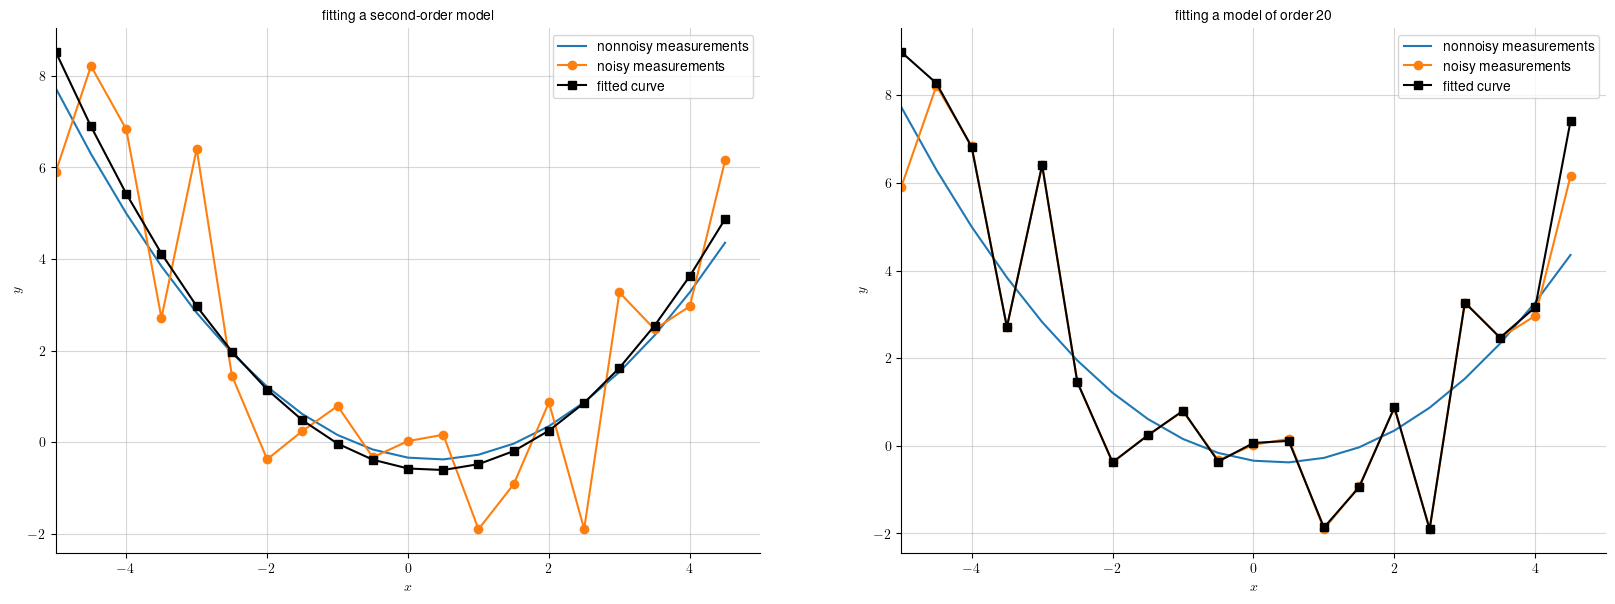

In [184]:
order = 2
par = np.random.randn(order+1, 1) #generate random parameters
var_noise = 3  #noise variance
std = np.sqrt(var_noise) #standard deviation

interval = np.arange(-5, 5, 0.5)
N = max(interval.shape) #number of data points

higher_order = 20

H = np.zeros((N, order+1))
H_higher = np.zeros((N, higher_order+1))
H_higher[:, higher_order] = np.ones(N) #last column is all ones
H[:, order] = np.ones(N) #last column is all ones

H[:, :order] = np.array([
    interval**2, interval
]).T

H_higher[:, :higher_order] = np.array(
    [interval**i for i in range(20, 0, -1)]
).T

yvec = H@par + std*np.random.randn(N, 1) #with noise
yvec_true = H@par #without noise

par_hat = np.linalg.inv(H.T@H)@H.T@yvec
par_hat_higher_order = np.linalg.inv(H_higher.T@H_higher)@H_higher.T@yvec

y_hat = H@par_hat
y_hat_higher_order = H_higher@par_hat_higher_order

print(f"Model parameters [a, b, c] and estimates: ")
print(f"Model parameters: [{par[0][0]}, {par[1][0]}, {par[2][0]}]")
print(f"Estimates: [{par_hat[0][0]}, {par_hat[1][0]}, {par_hat[2][0]}]")

print(f"Noise Variance: {var_noise}")

print("Higher order parameters: ")
print(par_hat_higher_order)

#testing the prediction
x = -1.3

y_prediction_high = (np.array([x**i for i in range(20, -1, -1)]) @ par_hat_higher_order)[0]
y_prediction_low = (np.array([x**i for i in range(2, -1, -1)]) @ par_hat)[0]
y_true_single = (np.array([x**i for i in range(2, -1, -1)]) @ par)[0]

print("An x, true ym and its prediction of higher and lower orders: ")
print(x, y_true_single, y_prediction_high, y_prediction_low)

#figure 5 (illustrating overfitting)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.rcParams['figure.figsize']=20, 15
fig = plt.figure()


ax = fig.add_subplot(221)
ax.plot(interval, yvec_true, label="nonnoisy measurements", color="tab:blue")
ax.plot(interval, yvec, label="noisy measurements", marker="o", color="tab:orange")
ax.plot(interval, y_hat, label="fitted curve", marker="s", color="black")
ax.set_xlabel("$x$", fontsize=10)
ax.set_ylabel("$y$", fontsize=10)
ax.set_xlim([-5, 5])
ax.set_title("fitting a second-order model", fontsize=10)
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)

plt.legend()

ax = fig.add_subplot(222)
ax.plot(interval, yvec_true, label="nonnoisy measurements", color="tab:blue")
ax.plot(interval, yvec, label="noisy measurements", marker="o", color="tab:orange")
ax.plot(interval, y_hat_higher_order, label="fitted curve", marker="s", color="black")
ax.set_xlabel("$x$", fontsize=10)
ax.set_ylabel("$y$", fontsize=10)
ax.set_xlim([-5, 5])
ax.set_title("fitting a model of order 20", fontsize=10)
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)

plt.legend()

#plt.savefig("figs/fig-5.pdf", format="pdf", bbox_inches="tight")

plt.show()

**Figure 31.5** The plot on the left shows the result of fitting a second-order model onto the measurements, while the plot on the right shows the result of fitting a model of order $20$.

Now, given the same $N$ data points $\{x_n,y_n\}$, we could consider fitting a higher-order model; one that weaves more closely through the $\{x_n,y_n\}$ points in the 2D plane. For instance, we could consider fitting a fifth-order model with parameters $\theta=\{a,b,c,d,e,f\}$ instead of the second-order model, such as:

$$
\widehat{y}_m=\widehat{a}\, x_m^5+\widehat{b}\, x_m^4 +\widehat{c}\,x_m^3+\widehat{d}\, x_m^2+\widehat{e}\,x_m+\widehat{f} \tag{31.150}
$$

Doing so would amount to overfitting (fitting a more complex model than necessary since the data originates from a second-order model to begin with). While the fifth-order model may fit the given data points $\{x_n,y_n\}$ better than the second-order model, the higher-order model will perform poorly on predicting future samples $y_m$. Poor performance means that if we were to substitute $x_m$ into the higher-order model, the predicted value $\widehat{y}_m$ will generally be far from the value $y_m$ that would result from the true model.  This situation is illustrated in the right-hand plot in Fig. 31.5. The black curve shows the same $N=20$ noisy measurements from before, while the blue curve shows the same non-noisy measurements. We now fit a model of order $20$ even though the data was generated from a second-order model. We observe in this case that the fitted  curve lies on top of the black curve. In other words, the fitting now is so good that the fitted curve weaves through the measurement points and even accommodates the  presence of noise in the measurements. This property is undesirable because it will generally lead to bad prediction performance. For instance, for the same point $x=-1.3$, the new fitted curve now predicts:

$$x=-1.3\;\;\Longrightarrow \widehat{y}\approx -0.4718 \tag{31.151}$$

which is further away from the true value at approximately $-2.7781$.